# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Oscar Nolen

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [1]:
# import statements
import pandas as pd
import seaborn as sns

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [7]:
#Question 1 Part A using code, show the nulls in the dataframe
nulls = bostondata.isnull()
nulls.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:

The easiest approach would be to replace null values with some other derived value. Typically, the mean, median, or mode of values given by the particular column are a good choice, since these might not skew the dataset too much. You could also try choosing randomly from the range of values given. If there are too many null values for a given column though, it may be better to just drop the column. In general, the approach is to remove null values without modifying the distribution of the data too much.

In [8]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-8-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [9]:
# Question 2 code: lets get the value counts for our new column
bostondata['month'].value_counts()

,count
month,
3.0,1721
9.0,1649
5.0,1594
6.0,1504
4.0,1501
7.0,1421
2.0,1404
10.0,1358
8.0,1283


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [10]:
#Question 3 code: statistical information
bostondata.describe()

,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [11]:
#Question 4 Part A Code: Value Counts
data = bostondata['description'].value_counts(normalize=True)
data

,proportion
description,
Failure to Obtain Permit,0.245661
Unsafe and Dangerous,0.219171
Maintenance,0.098034
Testing & Certification,0.054067
Unsafe Structures,0.042213
...,...
Grounding electrode conduction,0.000060
Removal/Making Structure Safe,0.000060
Use & Occupancy,0.000060


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:

Top three problems are failure to obtain permit, unsafe and dangerous conditions, and maintenance.


## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

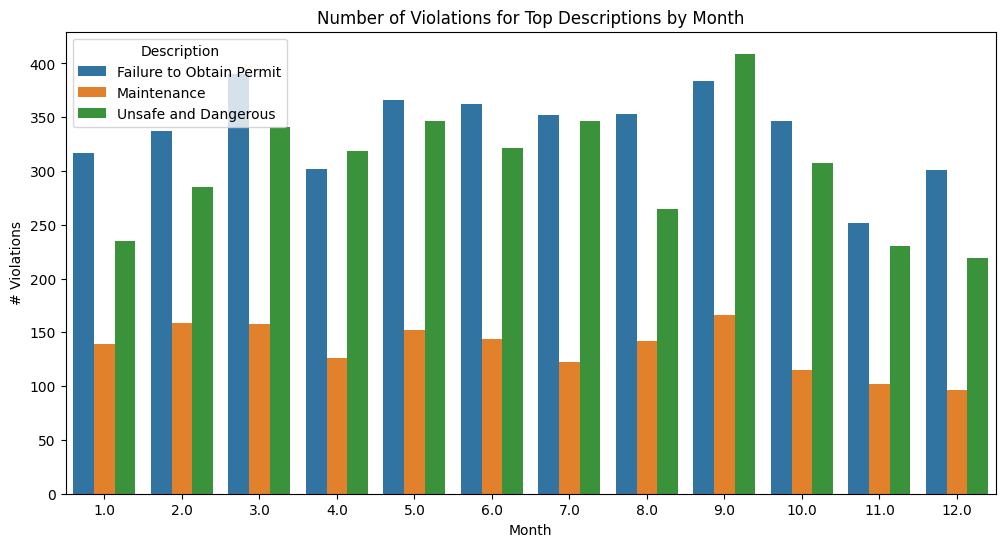

In [30]:
import matplotlib.pyplot as plt

# count each problem type per month
monthly_description_counts = bostondata.groupby(['month', 'description']).size().reset_index(name='count')

# get top descriptions for filtering
# correspond to previous question yuh
top_descriptions = bostondata['description'].value_counts().nlargest(3).index

# filter monthly counts by top descriptions for easier display
monthly_description_counts_top = monthly_description_counts[monthly_description_counts['description'].isin(top_descriptions)]

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_description_counts_top, x='month', y='count', hue='description')
plt.title('Number of Violations for Top Descriptions by Month')
plt.xlabel('Month')
plt.ylabel('# Violations')
plt.legend(title='Description', loc='upper left')
plt.show()

## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:

It seems like 'failure to obtain permit' and 'maintenance' are fairly constant throughout the year, with the permit issue being more common. Issues of 'maintenance' are also pretty common but see a noticeable increase in the middle of the year. There seem to be less problems of this type in the winter time. This is likely due to jobs and employment conditions that are related to outdoor work. In the summer months for example, dangerous conditions related to heat would be more common.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [31]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [32]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

In [ ]:
# Question 5 Visualization

In [ ]:
# Question 6 Visualization

In [ ]:
# Question 7 Visualization

In [ ]:
# Question 8 Visualization

## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:
